In [32]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, models, regularizers
from keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

In [6]:
#Change format of data from list to dictionary and we switch keys position for number position
word_index = reuters.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])

565248/550378 [==============================] - 0s 0us/step


In [ ]:
 #Look  description of the first movie
for i in train_data[0]: 
    #this minus is cuz this positions have reserveb words 
    print(word_index.get(i -3))

In [8]:
train_labels[0]

3

In [12]:
#Put all words in numbers
def vectorizar(sequence, dim=10000): 
    results = np.zeros((len(sequence), dim))
    for i, sequence in enumerate(sequence): 
        results[i, sequence] = 1 
    return results

In [21]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [20]:
#Change format from list to tensor 
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [53]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dropout(0.75))
model.add(layers.Dense(32, activation='relu',))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                640064    
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 46)                1518      
                                                                 
Total params: 643,662
Trainable params: 643,662
Non-trainable params: 0
_________________________________________________________________


In [58]:
history = model.fit(x_train,y_train, epochs=9, batch_size=512, validation_split=0.3)

Epoch 1/9
13/13 [==============================] - 1s 56ms/step - loss: 1.5781 - accuracy: 0.6017 - val_loss: 1.3582 - val_accuracy: 0.6994
Epoch 2/9
13/13 [==============================] - 1s 52ms/step - loss: 1.5528 - accuracy: 0.6052 - val_loss: 1.3322 - val_accuracy: 0.7024
Epoch 3/9
13/13 [==============================] - 1s 53ms/step - loss: 1.5274 - accuracy: 0.6136 - val_loss: 1.3076 - val_accuracy: 0.7024
Epoch 4/9
13/13 [==============================] - 1s 53ms/step - loss: 1.4676 - accuracy: 0.6278 - val_loss: 1.2923 - val_accuracy: 0.7072
Epoch 5/9
13/13 [==============================] - 1s 53ms/step - loss: 1.4383 - accuracy: 0.6373 - val_loss: 1.2794 - val_accuracy: 0.7076
Epoch 6/9
13/13 [==============================] - 1s 54ms/step - loss: 1.3975 - accuracy: 0.6429 - val_loss: 1.2633 - val_accuracy: 0.7117
Epoch 7/9
13/13 [==============================] - 1s 53ms/step - loss: 1.4163 - accuracy: 0.6401 - val_loss: 1.2572 - val_accuracy: 0.7095
Epoch 8/9
13/13 [===

<function matplotlib.pyplot.show>

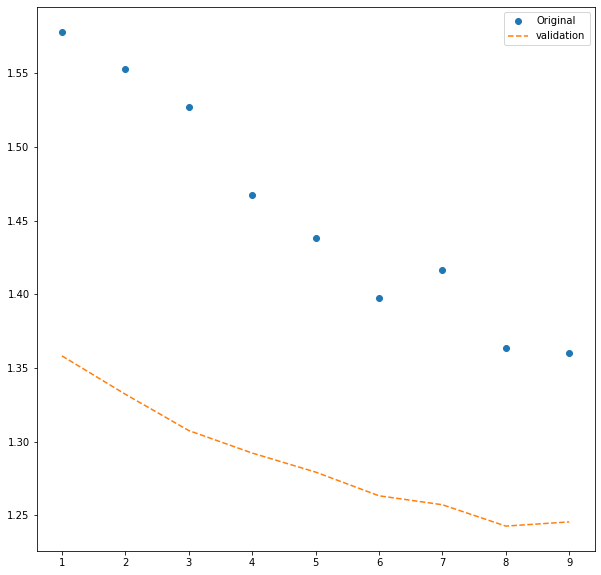

In [59]:
#Grafic in Loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'o', label = 'Original')
plt.plot(epochs, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

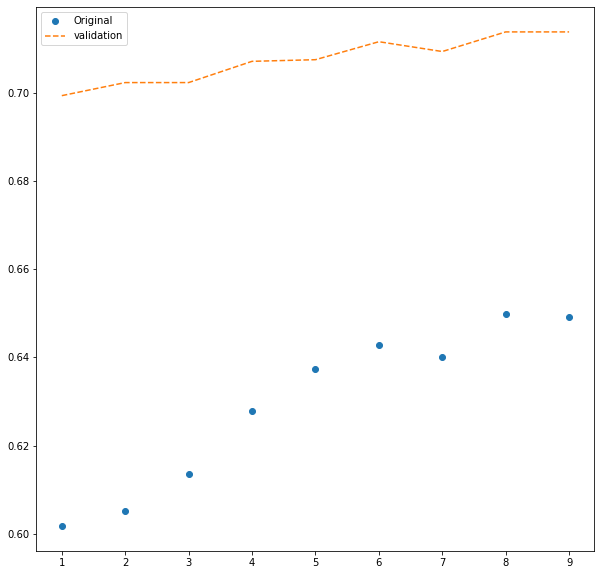

In [60]:
#Grafic in accuracy 
history_dict = history.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']

fig = plt.figure(figsize=(10,10))
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'o', label = 'Original')
plt.plot(epochs, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show

In [65]:
model.evaluate(x_test, y_test)
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.3260 - accuracy: 0.7017


In [68]:
#final prediction
np.argmax(predictions[0])

3